In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/Google Colab

/content/drive/My Drive/Google Colab


In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from PIL import Image
import numpy as np
import os

Using TensorFlow backend.


In [0]:
seed = 7
np.random.seed(seed)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [0]:
def load_images_to_data(image_label, image_directory, features_data, label_data):
    list_of_files = os.listdir(image_directory)
    for file in list_of_files:
        image_file_name = os.path.join(image_directory, file)
        if ".png" in image_file_name:
            img = Image.open(image_file_name).convert("L")
            img = np.resize(img, (28,28,1))
            im2arr = np.array(img)
            im2arr = im2arr.reshape(1,28,28,1)
            features_data = np.append(features_data, im2arr, axis=0)
            label_data = np.append(label_data, [image_label], axis=0)
    return features_data, label_data

In [0]:
X_train, y_train = load_images_to_data('1', 'data/mnist_data/train/1', X_train, y_train)
X_test, y_test = load_images_to_data('1', 'data/mnist_data/validation/1', X_test, y_test)

In [0]:
X_train/=255
X_test/=255

In [0]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [12]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Train on 60005 samples, validate on 10002 samples
Epoch 1/7
60005/60005 [==============================] - 54s 907us/step - loss: 0.5125 - acc: 0.8346 - val_loss: 0.0809 - val_acc: 0.9750
Epoch 2/7
60005/60005 [==============================] - 54s 893us/step - loss: 0.1573 - acc: 0.9528 - val_loss: 0.0522 - val_acc: 0.9828
Epoch 3/7
60005/60005 [==============================] - 54s 892us/step - loss: 0.1224 - acc: 0.9630 - val_loss: 0.0433 - val_acc: 0.9874
Epoch 4/7
60005/60005 [==============================] - 54s 896us/step - loss: 0.0997 - acc: 0.9704 - val_loss: 0.0369 - val_acc: 0.9877
Epoch 5/7
60005/60005 [==============================] - 54s 899us/step - loss: 0.0888 - acc: 0.9733 - val_loss: 0.0310 - val_acc: 0.9899
Epoch 6/7
60005/60005 [==============================] - 54s 894us/step - loss: 0.0800 - acc: 0.9759 - val_loss: 0.0290 - val_acc: 0.9906
Epoch 7/7
60005/60005 [==============================] - 54s 906us/step - 

In [15]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.026405569478376214, 0.9916016796640672]


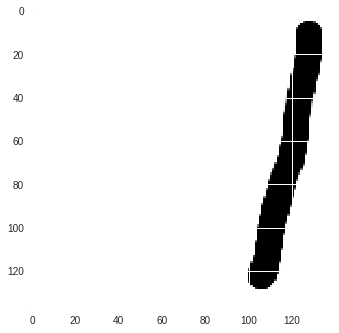

In [28]:
img = Image.open('data/mnist_data/validation/1/1_2.png').convert("L")
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

In [26]:
y_pred = model.predict_classes(im2arr)
print(y_pred)

[1]


TypeError: ignored

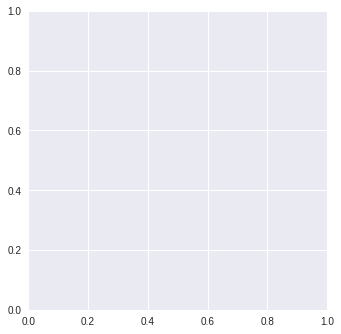